In [ ]:
!pip install docx2txt
import docx2txt

In [ ]:
resume = docx2txt.process('Resume3.docx')

In [ ]:
print(resume)

In [ ]:
import json
f = open('Job_Description.json')
job_description = json.load(f)

In [ ]:
print(job_description)

{'Web Developement': ['cookies', 'cache', 'html', 'css', 'javascript', 'wordpress', 'fullstack', 'git', 'github', 'devops', 'hypertext markup language', 'cascading style sheets', 'Bootstrap', 'backend', 'frontendResponsive design', 'Semantic markup', 'SaaS', 'Server-side scripting', 'php', 'frameworks', 'Visual hierarchy', 'Infinite/parallax scrolling', 'API', 'deployment'], 'Machine learning': ['python', 'pandas', 'keras', 'tensorflow', 'r programming', 'seaborn', 'opencv', 'matplotlib', 'visualization', 'graphs', 'bar chart', 'neural network', 'artificial intelligence', 'data science', 'supervised', 'unsupervised', 'semisupervised', 'safety', 'clustering', 'Association', 'numpy'], 'Software Development': ['java', 'c++', 'python', 'android development', 'web development', 'sql', 'dbms', 'nosql', 'api', 'application', 'browser', 'bug', 'cache', 'code', 'competative programming', 'deployment', 'debugging', 'oops', 'object', 'classes', 'datastructures', 'c'], 'Data analytics': ['analytic

In [ ]:
# Initializie score counters for each area
web = 0
machine = 0
software = 0
data = 0


# Create an empty list where the scores will be stored
scores = []

# Obtain the scores for each area
for area in job_description.keys():
        
    if area == 'Web Developement':
        for word in job_description[area]:
            if word in resume:
                web +=1
        scores.append(web)
        
    if area == 'Machine learning':
        for word in job_description[area]:
            if word in resume:
                machine +=1
        scores.append(machine)
        
    elif area == 'Software Development':
        for word in job_description[area]:
            if word in resume:
                software +=1
        scores.append(software)

        
    elif area == 'Data analytics':
        for word in job_description[area]:
            if word in resume:
                data +=1
        scores.append(data)
        
   

In [ ]:
import pandas as pd

In [ ]:
# Create a data frame with the scores summary
summary = pd.DataFrame(scores,index=job_description.keys(),columns=['score']).sort_values(by='score',ascending=True)
summary

,score
Software Development,1
Web Developement,2
Machine learning,2
Data analytics,9


In [ ]:
summary.index

Index(['Software Development', 'Web Developement', 'Machine learning',
       'Data analytics'],
      dtype='object')

In [ ]:
summary.score


Software Development    1
Web Developement        2
Machine learning        2
Data analytics          9
Name: score, dtype: int64

In [ ]:
import matplotlib.pyplot as plt

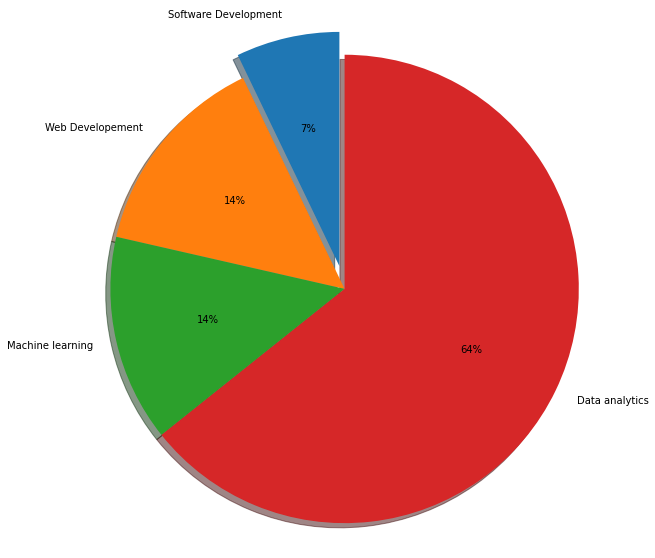

In [ ]:

# Create pie chart visualization
pie = plt.figure(figsize=(10,10))
plt.pie(summary['score'], labels=summary.index, explode = (0.1,0,0,0), autopct='%1.0f%%',shadow=True,startangle=90)
# plt.title('Computer Engineering Candidate - Overall Performance in Different Areas')
plt.axis('equal')
plt.show()

# Save pie chart as a .png file
pie.savefig('resume_screening_results.png')

In [ ]:
import seaborn as sns

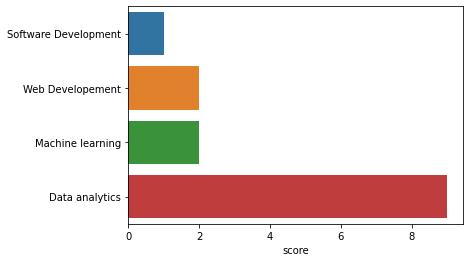

In [ ]:
sns.barplot(x=summary.score, y=summary.index, data=summary)

In [ ]:
 import plotly.express as px

In [ ]:
fig = px.pie(summary, values=summary.score ,names=summary.index,title='Computer Engineering Candidate - Overall Performance in Different Areas')
# fig.update_traces(textposition='inside',textinfo='percent+label' )

fig.show()


In [ ]:
job_detail=json.dumps(job_description) #converting json to string
content = [job_detail, resume] # now both job_description and resume are stored into list as we want to match them

In [ ]:
# Now fitting our list into countvectorizer Algorithm which convert our text into vectors
from sklearn.feature_extraction.text import CountVectorizer # it converts our text to vectors (NLP concept)
cv = CountVectorizer()
count_matrix = cv.fit_transform(content)

In [ ]:
# Now to see the similarity btw our resume and given job_description we will use Algorithm cosine_similarity
from sklearn.metrics.pairwise import cosine_similarity
mat = cosine_similarity(count_matrix)
print(mat)

[[1. 1.]
 [1. 1.]]


In [ ]:
print('Resume Matches by: '+  str(mat[1][0]*100) + '%')

Resume Matches by: 99.99999999999987%
